### Try Article Code

#### RDKit

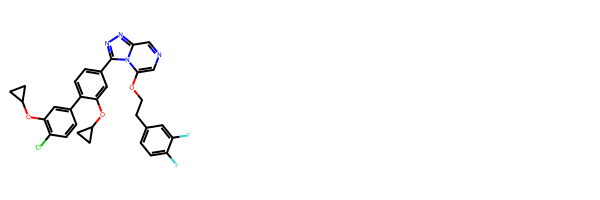

In [5]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Draw import MolsToGridImage

# Load a list of molecules
# smiles_list = [
#     "CCOC1=CC=CC=C1C(=O)OCC(=O)NC1=CC=CC=C1",
#     "NC(=O)C1=C(NC(=O)COC2=CC=CC=C2C(F)(F)F)SC=C1",
#     "CC(C)NC(=O)CSCC1=CC=CC=C1Br",
#     "CC1=CC=C(C(=O)NC(C)C)C=C1NC(=O)C1=CC=CO1",
#     "O=C(CN1CCCCCC1=O)NCC1=CC=C(N2C=CN=C2)C(F)=C1",
# ]

smiles_list = [
    "FC1=CC=C(CCOC2=CN=CC3=NN=C(N23)C2=CC=C(C(OC3CC3)=C2)C2=CC(OC3CC3)=C(Cl)C=C2)C=C1F",
]

mol_list = [Chem.MolFromSmiles(smi) for smi in smiles_list]
# Visualize molecules
MolsToGridImage(mol_list)

c1ccc(CCOc2cncc3nnc(-c4ccc(-c5cccc(OC6CC6)c5)c(OC5CC5)c4)n23)cc1


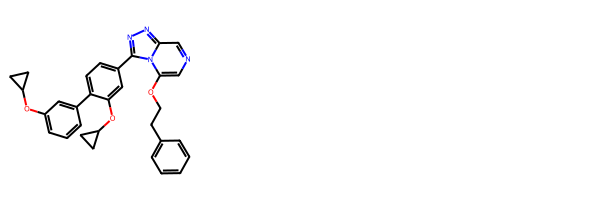

In [ ]:
# Get Scaffold of molecule
scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mol_list]
print(Chem.MolToSmiles(scaffolds[0]))
MolsToGridImage(scaffolds)

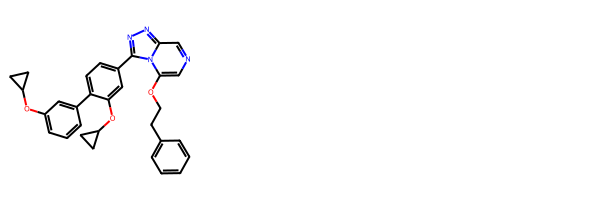

In [ ]:
# Try getting the another level of the scaffold
scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in scaffolds]
MolsToGridImage(scaffolds)

#### Datamol

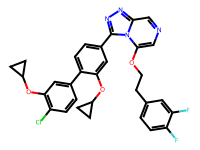

In [6]:
import datamol as dm


mol_list = [dm.to_mol(smi) for smi in smiles_list]
dm.to_image(mol_list, mol_size=(200, 150))

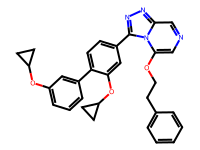

In [7]:
# Extracting Murcko scaffolds from list of compounds
scaffolds = [dm.to_scaffold_murcko(mol) for mol in mol_list]

dm.to_image(scaffolds, mol_size=(200, 150))

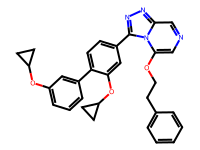

In [8]:
# Extracting Murcko scaffolds level 3
scaffolds = [dm.to_scaffold_murcko(mol) for mol in scaffolds]

dm.to_image(scaffolds, mol_size=(200, 150))

Original Scaffold SMILES: c1ccc(CCOc2cncc3nnc(-c4ccc(-c5cccc(OC6CC6)c5)c(OC5CC5)c4)n23)cc1
Smaller Scaffold SMILES: c1ccc(CCOc2cncc3nnc(-c4ccc(-c5cccc(OC6CC6)c5)c(OC5CC5)c4)n23)cc1


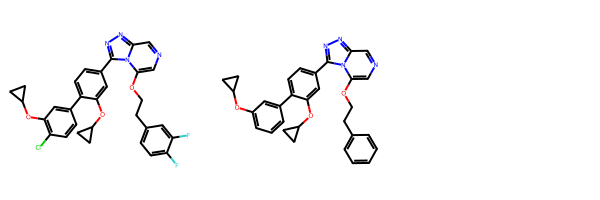

In [9]:
## Try to get smaller scaffold
def get_smaller_scaffold(mol, max_iterations=5):
    for _ in range(max_iterations):
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        if scaffold.GetNumAtoms() < mol.GetNumAtoms():
            mol = scaffold
        else:
            break
    return mol

smiles_list = ["FC1=CC=C(CCOC2=CN=CC3=NN=C(N23)C2=CC=C(C(OC3CC3)=C2)C2=CC(OC3CC3)=C(Cl)C=C2)C=C1F"]
mol_list = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Get Scaffold of molecule iteratively
scaffolds = [get_smaller_scaffold(mol) for mol in mol_list]

print("Original Scaffold SMILES:", Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol_list[0])))
print("Smaller Scaffold SMILES:", Chem.MolToSmiles(scaffolds[0]))

# Visualize molecules
MolsToGridImage([mol_list[0], scaffolds[0]])


The code isn't giving us the smallest scaffold possible.

Try other SMILES list

Original Scaffold SMILES: O=C(COC(=O)c1ccccc1)Nc1ccccc1
Smaller Scaffold SMILES: O=C(COC(=O)c1ccccc1)Nc1ccccc1


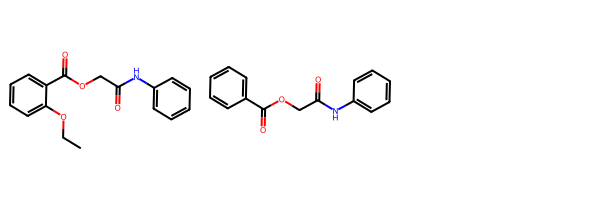

In [10]:
smiles_list = [
    "CCOC1=CC=CC=C1C(=O)OCC(=O)NC1=CC=CC=C1",
    "NC(=O)C1=C(NC(=O)COC2=CC=CC=C2C(F)(F)F)SC=C1",
    "CC(C)NC(=O)CSCC1=CC=CC=C1Br",
    "CC1=CC=C(C(=O)NC(C)C)C=C1NC(=O)C1=CC=CO1",
    "O=C(CN1CCCCCC1=O)NCC1=CC=C(N2C=CN=C2)C(F)=C1",
]

mol_list = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Get Scaffold of molecule iteratively
scaffolds = [get_smaller_scaffold(mol) for mol in mol_list]

print("Original Scaffold SMILES:", Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol_list[0])))
print("Smaller Scaffold SMILES:", Chem.MolToSmiles(scaffolds[0]))

# Visualize molecules
MolsToGridImage([mol_list[0], scaffolds[0]])

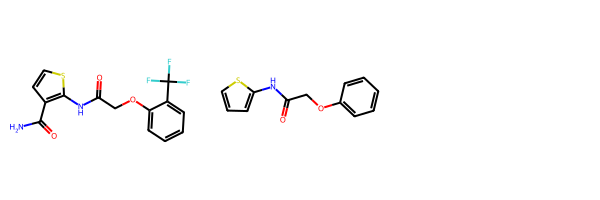

In [11]:
# Visualize molecules
MolsToGridImage([mol_list[1], scaffolds[1]])